# <center>Day-1 Practical Session, 25 May 2021</center>
## <center>Part 2: Bipartite Incidence Graph (BIG) for Adaptive Cluster Sampling (ACS)</center>
#### <center> *Li-Chun Zhang*<sup>1,2,3</sup> and *Melike Oguz-Alper*<sup>2</sup> </center>
  
##### <center> <sup>1</sup>*University of Southampton (L.Zhang@soton.ac.uk)*, <sup>2</sup>*Statistics Norway*, <sup>3</sup>*University of Oslo* </center>
***

### Illustration I: Adaptive Cluster Sampling, a small data set extended from Thompson (1990)

In this illustration, the efficiency of the unbiased estimators of the population mean will be examined under three strategies described below using BIG sampling (BIGS). 

***
#### Description of the population and sampling strategies
* Data set

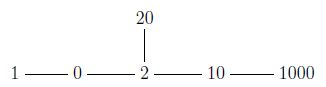

* Threshold for adaptive tracing: $y_i\geq5$
* $s_0$ of size: $\mid s_0\mid =2$ selected with SRS
* Strategy I: $\mathcal{B}$, *edge* node $2$ is not used in the estimation if it is observed via its ancestor network; *modified* HTE: 

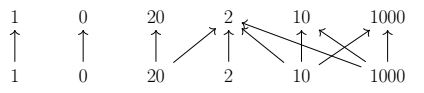

* Strategy II: $\mathcal{B}^*$, HTE

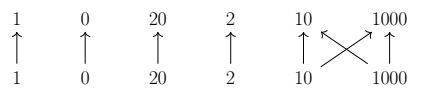

* Strategy III: *Sample-dependent BIGS strategy*, HTE, apply either strategy $\mathcal{B}^*$ or $\mathcal{B}^\dagger$, depending on which nodes selected first, over repeated sampling given the first selection 
    * If  $s_0 \cap \{ 20,2, 10, 1000 \} = \{ 2\}$, e.g. $s_0 = \{ 0, 2\}$, apply strategy $\mathcal{B}_s^*$:
 
    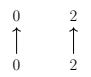
     
    * If  $s_0 \cap \{ 20,10,1000 \} \subseteq \{ 10,1000\}$ or $s_0 \cap \{ 20,10, 1000 \} = \{ 20\})$, apply strategy $\mathcal{B}_s^\dagger$:
    
    For e.g. $s_0 = \{ 1, 10\}$:
    
    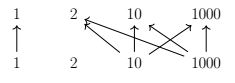 
   
    For e.g. $s_0 = \{ 2, 20\}$: 
   
    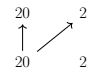
    
    * If  $s_0 \cap \{ 20,10,1000 \} \subseteq \{ 20,10\}$ or $s_0 \cap \{ 20,10, 1000 \} = \{ 20,1000\}$, choose either $\{10,1000\}$ or $\{20\}$ as the ancestor network of edge node $2$ and apply strategy $\mathcal{B}_s^\dagger$:
    
    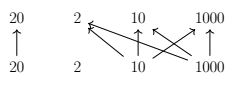
    
    or
    
    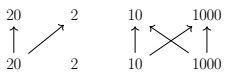
    
*** 
#### Formula sheet
* Population mean

    $\theta=\frac{\sum_{i\in F}y_i}{N},\quad y_i=\{1,0,2,20,10,1000\}, \quad N=6$
* Unbiased estimator of the population mean based on initial sample, $s_0$

    $\hat{\theta}_{s0}=\frac{\sum_{i\in s_0}y_i}{n}$
* HTE of the population mean under ACS:

    $\hat{\theta}_{HT}=\sum_{\kappa\in \Omega_s} \frac{y_{\kappa}}{\pi_{(\kappa)}}$

* Calculation of inclusion probabilies $\pi_{(\kappa)}=\mathrm{Pr}(\kappa\in\Omega_s)$ under SRS of $s_0$:

    $\pi_{(\kappa)}=1-\bar{\pi}_{\beta_{\kappa}}=1-\binom{N-\mid\beta_{\kappa}\mid}{n}/\binom{N}{n}$, where $\mid\beta_{\kappa}\mid$ is the size of the ancestor network of $\kappa$
    
* Modified HTE, $\hat{\theta}_{HT}^*$, and the HTE provides the same estimates. The former differ with respect to the Rao-Blackwell (RB) method:

    $\hat{\theta}_{RB}=E(\hat{\theta}_{HT}^*\mid \Omega_s)$

***

#### Description of R-function <font color=green>**mainACS**<font>
##### 1. Function parameters
* **first.sample**: The first sample set to be selected in repeated sampling over the sample space. A vector of size two with values among $y_i$ used. Default value $c(0,2)$ 
* **choice20**: Use $20$ as the ancestor network of edge-node $2$ in case **first.sample** consists of $\{20,10\}$ or $\{20,1000\}$. No effect for other choices of **first.sample** 

##### 2. Main steps of the Function
* Edges, *observational links*, between sampling units in $U$ and the study units in $\Omega$ are constructed under each strategy
* The size of the ancestors of $\kappa\in\Omega$ are obtained based on the observational links
* All possible samples of sizes $n=2$ selected from the population with SRSWOR and $\Omega_s$ obtained via observational links. The first sample in the repeated sampling is provided by **first.sample**
* For each random sample, the population mean is estimated with the unbiased estimators mentioned above 
* RB method is applied to the modified HTE under strategy I
    
##### 3. Main outputs of the function
* Expected values and sampling variances of the estimators under SRS and under ACS with different BIGS strategies

   
***

In [ ]:
mainACS <- function(first.sample=c(0,2),choose20=T){
yi <- c(1,0,20,2,10,1000)
N <- length(yi)
n <- 2
pri <- n/N
idx_F <- yi
idx_omega <- yi
  
# Strategy with B
edgeik <- data.frame(i=c(1,0,20,20,2,10,10,10,1000,1000,1000),k=c(1,0,20,2,2,2,10,1000,2,10,1000))

# Strategy with B*
edgeik_star <- data.frame(i=c(1,0,20,2,10,10,1000,1000),k=c(1,0,20,2,10,1000,10,1000))

# Strategy with Bdagger, with ancestor ntw. {20}
edgeik_dagger_opta <- data.frame(i=c(1,0,20,20,10,10,1000,1000),k=c(1,0,20,2,10,1000,10,1000))

# Strategy with Bdagger, with ancestor ntw. {10,1000}
edgeik_dagger_optb <- data.frame(i=c(1,0,20,10,10,10,1000,1000,1000),k=c(1,0,20,2,10,1000,2,10,1000))
  
# Multiplicities
card_betak_star <- NULL
card_betak_dagger_opta <- NULL
card_betak_dagger_optb <- NULL
for(k in idx_omega){
  card_betak_star <- c(card_betak_star,sum(edgeik_star$k %in% k))  
  card_betak_dagger_opta <- c(card_betak_dagger_opta,sum(edgeik_dagger_opta$k %in% k))  
  card_betak_dagger_optb <- c(card_betak_dagger_optb,sum(edgeik_dagger_optb$k %in% k))  
}

  
all.subsets <- combn(N,n)
nr.all.subsets <- dim(all.subsets)[2]
  
tmp.subset <- c(1:nr.all.subsets)[apply(all.subsets,2,FUN = function(x) sum(x %in% which(idx_F %in% first.sample))==2)]
B <- c(1:nr.all.subsets)
muHT_s0 <- NULL
muHT <- NULL
muHT_SD <- NULL

s1_all <- rep(list(0),nr.all.subsets)

for(b in 1:nr.all.subsets){
if(b==1){s <- tmp.subset}

if(b>1 & b<nr.all.subsets){B <- c(1:nr.all.subsets)[!(c(1:nr.all.subsets) %in% tmp.subset)]
s <- sample(B,1)
tmp.subset <- c(tmp.subset,s)
}

if(b==nr.all.subsets){B <- c(1:nr.all.subsets)[!(c(1:nr.all.subsets) %in% tmp.subset)]
  s <- B}

s0 <- idx_F[all.subsets[,s]]

# HTE based on s0
muHT_s0 <- c(muHT_s0,mean(s0))

# Strategy I, B
  s1 <- unique(edgeik$k[edgeik$i %in% s0])
  
# Strategy II, Bstar
  s1_star <- unique(edgeik_star$k[edgeik_star$i %in% s0])

#  Strategy I, Modified HTE & Strategy II, HTE
  prk <- 1-choose(N-card_betak_star,n)/choose(N,n)
  tmp.muHT <- sum(yi[idx_F %in% s1_star]/prk[idx_F %in% s1_star])/N

# Sample-dependent strategy
  s1_SD <- s1_star
  prk_SD <- prk
  sample.str <- 'Bstar'
  
if(sum(intersect(c(20, 10, 1000), first.sample))>0){
if(sum(intersect(c(20,10,1000),first.sample) %in% 20)==1){
  s1_SD <- unique(edgeik_dagger_opta$k[edgeik_dagger_opta$i %in% s0])
  prk_SD <- 1-choose(N-card_betak_dagger_opta,n)/choose(N,n)
  sample.str <- 'Bdagger'
} }

if(sum(intersect(c(10, 1000), first.sample))>0){  
if(sum((intersect(c(10,1000),first.sample) %in% c(10,1000)))>0){
    s1_SD <- unique(edgeik_dagger_optb$k[edgeik_dagger_optb$i %in% s0])
    prk_SD <- 1-choose(N-card_betak_dagger_optb,n)/choose(N,n)
    sample.str <- 'Bdagger'
} }

if(sum(c(20,10,1000) %in% first.sample)>0){
# if(20 %in% (intersect(c(20,10,1000),first.sample[first.sample %in% c(20,10,1000)]))){
if(sum(first.sample %in% c(20,10))==2 | sum(first.sample %in% c(20,1000))==2){
  if(choose20==T){
    s1_SD <- unique(edgeik_dagger_opta$k[edgeik_dagger_opta$i %in% s0])
    prk_SD <- 1-choose(N-card_betak_dagger_opta,n)/choose(N,n)
    sample.str <- 'Bdagger'
  }
  
  if(choose20==F){
    s1_SD <- unique(edgeik_dagger_optb$k[edgeik_dagger_optb$i %in% s0])
    prk_SD <- 1-choose(N-card_betak_dagger_optb,n)/choose(N,n)
    sample.str <- 'Bdagger'
  }
} }

tmp.muHT_SD <- sum(yi[idx_F %in% s1_SD]/prk_SD[idx_F %in% s1_SD])/N  

s1_all[[b]] <- s1

muHT <- c(muHT,tmp.muHT)
muHT_SD <- c(muHT_SD, tmp.muHT_SD)  

}

# Rao-Blackwellisation for strategy I
muHT_modified_RB <- NULL
for(j in 1:nr.all.subsets){
  # j <- 14
  sel <- sapply(s1_all,FUN = function(x) sum(s1_all[[j]] %in% x)==length(s1_all[[j]]) & length(s1_all[[j]])==length(x))
  muHT_modified_RB <- c(muHT_modified_RB,mean(muHT[sel]))
}

cat("first.sample =",first.sample,"\n")
cat("sample_dependent_strategy =",sample.str,"\n")
cat("pop.mean =",mean(yi),"\n")

result_ACS <- t(array(c(mean(muHT_s0),mean(muHT),mean(muHT_modified_RB),mean(muHT),mean(muHT_SD),c(var(muHT_s0),var(muHT),var(muHT_modified_RB),var(muHT),var(muHT_SD))*(nr.all.subsets-1)/nr.all.subsets),c(5,2)))
colnames(result_ACS) <- c('HT_s0','ACS_HTmodif','ACS_HTmodif_RB','ACS_HT_Bstar','ACS_HT_SD')
rownames(result_ACS) <- c('ExpectedValue','Variance')
 
print(result_ACS)
}